In [19]:
import os
import glob
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import read_csv
import keras.backend as kb
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Run for GPU/CUDA ML, comment out if you dont have it configured.
window = 20
gpu_devices = tf.config.list_physical_devices('GPU')

In [7]:
directory = "/content/drive/MyDrive/CS3237 Group Project/Gesture Recognition Model/"
gestures = ["gestureA", "gestureB"]

NUM_FEATURES = 6
TIMESTEP = 20
NUM_GESTURES = len(gestures)

x_train_list = []
y_train_list = []

for gesture in gestures:
    all_data = []
    gesture_dir = os.path.join(directory, gesture)
    all_gesture_files = glob.glob(gesture_dir + "/**/*.csv", recursive=True)

    num_files = len(all_gesture_files)

    for file in all_gesture_files:
        filename = os.path.join(gesture_dir, file)
        data = np.loadtxt(filename, delimiter=',', skiprows=1)
        all_data.append(data)

    final_data = np.concatenate(all_data, axis=0 )
    final_data = np.reshape(final_data, (num_files, TIMESTEP, NUM_FEATURES))

    labels = np.zeros((num_files, NUM_GESTURES))
    lbl_idx = gestures.index(gesture)
    labels[:, lbl_idx] = 1

    x_train_list.append(final_data)
    y_train_list.append(labels)

x_train = np.concatenate(x_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)

print(f"X_train shape: {x_train.shape}")
print(f"Y_train shape: {y_train.shape}")

X_train shape: (2053, 20, 6)
Y_train shape: (2053, 2)


In [8]:
# ## 4 gestures, windowsize = 100, overlap = 50
# directory = "/content/drive/MyDrive/cc2650_data"

# num_gestures = 1
# window = 20
# overlap = 10
# data_columns = 9
# model_name = '/content/lstm_model_' + str(window) + '_' + str(overlap)


# ## Load data previously saved as numpy text and reshape it to orginal form
# loaded_arr = np.loadtxt(directory[0])
# x_train = loaded_arr.reshape(loaded_arr.shape[0], loaded_arr.shape[1] // data_columns, data_columns)

# loaded_arr1 = np.loadtxt(directory[1])
# y_train = loaded_arr1

# loaded_arr2 = np.loadtxt(directory[2])
# x_test = loaded_arr2.reshape(loaded_arr2.shape[0], loaded_arr2.shape[1] // data_columns, data_columns)

# loaded_arr3 = np.loadtxt(directory[3])
# y_test = loaded_arr3

# print('##Before reshaping')
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

# y_train = to_categorical(y_train, num_classes = num_gestures)
# y_test = to_categorical(y_test, num_classes = num_gestures)

# print('##After reshaping')
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)

In [20]:
def visualise(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [21]:
def evaluate_lstm(x_train, y_train, dropout):
    print("start evaluation!")
    LR = 0.0001
    verbose, epochs, batch_size = 1, 20, 64
    n_timesteps, n_features, n_outputs = x_train.shape[1], x_train.shape[2], y_train.shape[1]
    ##LSTM model structure
    model = Sequential()
    model.add(LSTM(100, input_shape=(n_timesteps, n_features), dropout=dropout))
    model.add(Dropout(dropout))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    opt = Adam(lr=LR)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.CategoricalAccuracy()])

    model.summary()
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose,
                        validation_split=0.1,  shuffle=True)
    ##plot
    visualise(history)

    # save model
    if not os.path.exists('lstm_models'):
        os.makedirs('lstm_models')
    model_name = os.path.join(directory, "model")
    model.save(model_name)
    # evaluate model
    #_, accuracy, cat_acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=verbose)
    return 100


# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

start evaluation!


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               42800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 53,102
Trainable params: 53,102
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
29/29 [==============================] - 3s 39ms/step - loss: 0.7231 - accuracy: 0.5225 - categorical_accuracy: 0.5225 - val_loss: 0.4959 - val_accuracy: 0.8932 - val_categorical_accuracy: 0.8932
Epoch 2/20
29/29 [=======================

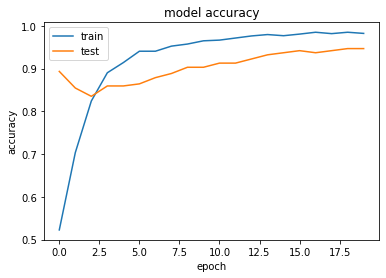

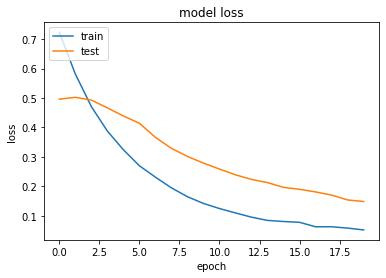

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS3237 Group Project/Gesture Recognition Model/model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/CS3237 Group Project/Gesture Recognition Model/model/assets


>#1: 10000.000
[10000.0]
Accuracy: 10000.000% (+/-0.000)


In [22]:
# run an experiment
def run_experiment(repeats=1):
    # repeat experiment
    dropout = 0.2
    # dropout = [0.0, 0.2, 0.3, 0.4, 0.5]
    scores = list()
    for r in range(repeats):
        score = evaluate_lstm(x_train, y_train, dropout)
        score = score * 100.0
        print('>#%d: %.3f' % (r + 1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)


# run the experiment
run_experiment()


In [23]:
# DONE

## Testing the model

In [ ]:
test_dir = os.path.join(directory, "test")
test_files = os.listdir(test_dir)
test_files.sort()

all_test_data = []
for test_file in test_files:
    filename = os.path.join(test_dir, test_file)
    test_data = np.loadtxt(filename, skiprows=1, delimiter=",")
    all_test_data.append(test_data)

num_test = len(all_test_data)
all_test_data = np.concatenate(all_test_data, axis=0)
test_data = np.reshape(all_test_data, (num_test, TIMESTEP, NUM_FEATURES))

In [ ]:
from keras.models import load_model
# ## Location of model of choice
model_name = os.path.join(directory, "model")

model = load_model(model_name)

In [ ]:
y_pred = model.predict(test_data)
print(y_pred)

[[0.12348571 0.87651426]
 [0.04510077 0.9548992 ]
 [0.9771846  0.02281543]
 [0.9876621  0.01233794]
 [0.9896277  0.01037233]]


In [ ]:
y_pred_label = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
print(y_pred_label)
print(y_label)

[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]


In [ ]:
if num_gestures == 4:
    class_names = ["Buddha clap", "Knob", "Pushback", "Swipe"]
elif num_gestures == 5:
    class_names = ["Buddha clap", "Crank", "Knob", "Pushback", "Swipe"]
elif num_gestures == 7:
    class_names = ["Buddha clap", "Crank left", "Crank right", "Knob left", "Knob right", "Pushback", "Swipe"]

name = np.array(class_names)
print(name)
print(type(name))

['Buddha clap' 'Knob' 'Pushback' 'Swipe']
<class 'numpy.ndarray'>


In [ ]:
output = []

for i in range(len(y_label)):
    if y_label[i] != y_pred_label[i]:
        actual = class_names[y_label[i]]
        pred = class_names[y_pred_label[i]]
        output.append([actual, pred])
        print("Actual: %s, Prediction: %s" % (actual, pred))

Actual: Buddha clap, Prediction: Knob
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Buddha clap, Prediction: Swipe
Actual: Knob, Prediction: Pushback
Actual: Knob, Prediction: Pushback
Actual: Knob, Prediction: Pushback
Actual: Knob, Prediction: Pushback
Actual: Knob, Prediction: Pushback
Actual: Knob, Prediction: Pushback
Actual: Kno

In [ ]:
import csv
from datetime import datetime

fields = ['Actual', 'Predicted']
now = datetime.now()
file = 'output_' + now.strftime("%d-%m-%Y_%H-%M-%S") + '.csv'
with open(file, 'w', newline='') as filename:
    write = csv.writer(filename)
    write.writerow(fields)
    write.writerows(output)